# KNN

1. KNN can highly affected by outlier data
2. This is the simplest method to implement.
3. Curse of dimentionality(no of features). if features increase the model performance go down
4. There are many method to find distance read all

$$ d = \sqrt{\sum{(X_i - x_i)^2}} $$

distance is indercty proportional to similarity
- K represnets no. of nearest neighbors. Generally K is odd whole number
- To resolve this problem __weighted nearest algorithms__ is used.

In [1]:
import numpy 
import statistics
import matplotlib.pyplot
import math

In [2]:
def getkey(r):
    '''
    fucntion returns index 1 value of param
    '''
    return r[1]

Taknig elements of class A

In [3]:
a = numpy.array([[10, 20], [20, 25], [15, 20], [30, 45], [10, 10], [50, 25], [30, 55], [40, 60]])

In [4]:
print(a)
print("*"*50)
print(a.T)
print("*" * 50)
x, y = a.T # first row assing to x and secnod y

print(f"x: {x}")
print("*"*50)

print(f"y: {y}")
print("*"*50)

[[10 20]
 [20 25]
 [15 20]
 [30 45]
 [10 10]
 [50 25]
 [30 55]
 [40 60]]
**************************************************
[[10 20 15 30 10 50 30 40]
 [20 25 20 45 10 25 55 60]]
**************************************************
x: [10 20 15 30 10 50 30 40]
**************************************************
y: [20 25 20 45 10 25 55 60]
**************************************************


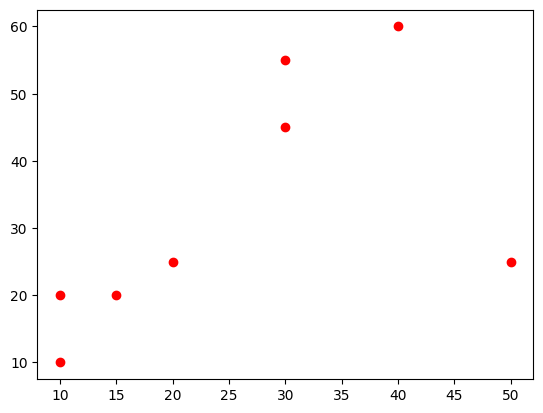

In [5]:
matplotlib.pyplot.scatter(x, y, c='r')

Taking elements of class B

[[147 158]
 [129 138]
 [140 142]
 [112 150]
 [126 137]
 [145 120]
 [158 125]
 [122 116]]
**************************************************
[[147 129 140 112 126 145 158 122]
 [158 138 142 150 137 120 125 116]]
**************************************************
x: [147 129 140 112 126 145 158 122]
**************************************************
y: [158 138 142 150 137 120 125 116]
**************************************************


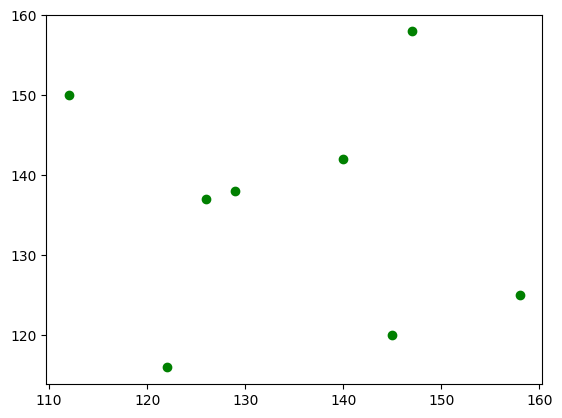

In [6]:
b = numpy.random.randint(110, 160, size=(8,2))
print(b)
print("*"*50)
print(b.T)
print("*" * 50)
x, y = b.T # first row assing to x and secnod y

print(f"x: {x}")
print("*"*50)

print(f"y: {y}")
print("*"*50)
matplotlib.pyplot.scatter(x, y, c='g')

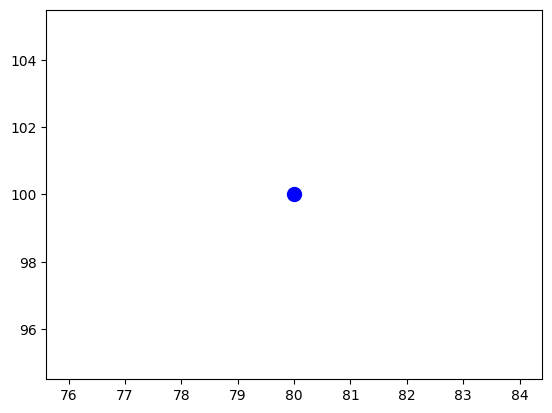

In [7]:

queryX = 80
queryY = 100
matplotlib.pyplot.plot(queryX, queryY, color='b', marker='o', markersize=10 )


## KNN

In [8]:
distanceList = []

for i in a:
    xd = abs(i[0] - queryX)
    yd = abs(i[1] - queryY)
    d = math.sqrt(xd**2 + yd**2)
    distanceList.append(('A', d, i))


for i in b:
    xd = abs(i[0] - queryX)
    yd = abs(i[1] - queryY)
    d = math.sqrt(xd**2 + yd**2)
    distanceList.append(('B', d, i))

print("*"*50)
distanceList

**************************************************


[('A', 106.30145812734649, array([10, 20])),
 ('A', 96.04686356149273, array([20, 25])),
 ('A', 103.07764064044152, array([15, 20])),
 ('A', 74.33034373659252, array([30, 45])),
 ('A', 114.0175425099138, array([10, 10])),
 ('A', 80.77747210701756, array([50, 25])),
 ('A', 67.26812023536856, array([30, 55])),
 ('A', 56.568542494923804, array([40, 60])),
 ('B', 88.61715409558128, array([147, 158])),
 ('B', 62.00806399170998, array([129, 138])),
 ('B', 73.23933369440222, array([140, 142])),
 ('B', 59.36328831862332, array([112, 150])),
 ('B', 59.033888572581766, array([126, 137])),
 ('B', 68.00735254367721, array([145, 120])),
 ('B', 81.9084855189009, array([158, 125])),
 ('B', 44.94441010848846, array([122, 116]))]

In [9]:
# distanceList.sort(key = getkey)
distanceList.sort(key= lambda d: d[1])
distanceList

[('B', 44.94441010848846, array([122, 116])),
 ('A', 56.568542494923804, array([40, 60])),
 ('B', 59.033888572581766, array([126, 137])),
 ('B', 59.36328831862332, array([112, 150])),
 ('B', 62.00806399170998, array([129, 138])),
 ('A', 67.26812023536856, array([30, 55])),
 ('B', 68.00735254367721, array([145, 120])),
 ('B', 73.23933369440222, array([140, 142])),
 ('A', 74.33034373659252, array([30, 45])),
 ('A', 80.77747210701756, array([50, 25])),
 ('B', 81.9084855189009, array([158, 125])),
 ('B', 88.61715409558128, array([147, 158])),
 ('A', 96.04686356149273, array([20, 25])),
 ('A', 103.07764064044152, array([15, 20])),
 ('A', 106.30145812734649, array([10, 20])),
 ('A', 114.0175425099138, array([10, 10]))]

In [10]:
kFactor = int(math.sqrt(len(a) + len(b)))
print("kfactor: ", kFactor)

if kFactor%2 == 0: kFactor+=1

print(f"kFactor: {kFactor}")

# take top kFactor elements from sortd distance list 
topKElements  = distanceList[: kFactor] # slicing of list

topKElements

kfactor:  4
kFactor: 5


[('B', 44.94441010848846, array([122, 116])),
 ('A', 56.568542494923804, array([40, 60])),
 ('B', 59.033888572581766, array([126, 137])),
 ('B', 59.36328831862332, array([112, 150])),
 ('B', 62.00806399170998, array([129, 138]))]

In [11]:
classes = list(x[0] for x in topKElements)
classes

['B', 'A', 'B', 'B', 'B']

In [12]:
# will give highest frequecny class
idenfifiedClass = statistics.mode(classes)

#  
print(f"{queryX}, {queryY} belongs to class {idenfifiedClass}")

80, 100 belongs to class B


In [13]:
# prepare list of nearest data points to plto lines between query jpoint and nearest data pionts 
nearestPointList = list(x[2] for x in topKElements)
nearestPointList

[array([122, 116]),
 array([40, 60]),
 array([126, 137]),
 array([112, 150]),
 array([129, 138])]

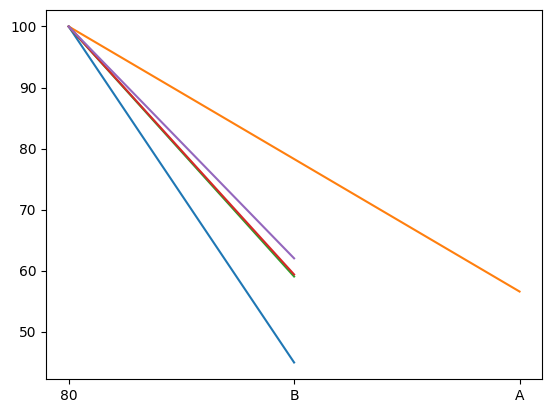

In [14]:
for i in topKElements:
    matplotlib.pyplot.plot([queryX, i[0]], [queryY, i[1]])